In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Beach_Water_Quality_-_Automated_Sensors.csv")

In [14]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40707 entries, 0 to 40706
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   40707 non-null  object 
 1   Measurement Timestamp        40707 non-null  object 
 2   Water Temperature            40707 non-null  float64
 3   Turbidity                    40707 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  40480 non-null  float64
 6   Wave Period                  40480 non-null  float64
 7   Battery Life                 40707 non-null  float64
 8   Measurement Timestamp Label  40707 non-null  object 
 9   Measurement ID               40707 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.1+ MB


In [16]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,40707.000000,40707.000000,10034.000000,40480.000000,40480.000000,40707.000000
mean,19.552109,4.698937,1.570235,-1608.029922,-1604.382584,11.057079
std,3.390676,31.788649,0.175118,12579.279837,12579.747261,0.758393
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,0.000000
25%,17.200000,0.710000,1.426000,0.111000,3.000000,10.600000
50%,19.800000,1.280000,1.578000,0.156000,3.000000,11.100000
75%,22.300000,2.480000,1.721000,0.203000,4.000000,11.500000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000


In [17]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                         0
Measurement Timestamp              0
Water Temperature                  0
Turbidity                          0
Transducer Depth               30673
Wave Height                      227
Wave Period                      227
Battery Life                       0
Measurement Timestamp Label        0
Measurement ID                     0
dtype: int64


Checked that the Transducer Depth column has many null values, hence dropped it.

In [18]:
data.drop(columns='Transducer Depth',inplace=True)

In [19]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
40702    False
40703    False
40704    False
40705    False
40706    False
Length: 40707, dtype: bool

In [20]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])

In [21]:
type(data['Measurement Timestamp'])

pandas.core.series.Series

In [22]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


In [23]:
data.set_index('Measurement Timestamp')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,
2018-04-07 00:30:00,Calumet Beach,21.7,3.15,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
2019-06-14 19:00:00,Ohio Street Beach,16.0,2.18,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2018-05-16 13:00:00,Ohio Street Beach,21.7,1.92,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
2018-05-16 14:00:00,Ohio Street Beach,21.9,1.81,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
2018-06-04 09:00:00,Ohio Street Beach,23.0,0.03,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900
...,...,...,...,...,...,...,...,...
2015-09-13 22:00:00,63rd Street Beach,18.9,29.55,-99999.992,-100000.0,5.5,09/13/2015 10:00 PM,63rdStreetBeach201509132200
2016-09-20 13:00:00,Calumet Beach,21.7,3.15,0.389,3.0,9.4,09/20/2016 1:00 PM,CalumetBeach201609201300
2016-09-14 19:00:00,Montrose Beach,21.9,0.01,0.360,3.0,9.4,09/14/2016 7:00 PM,MontroseBeach201609141900


In [24]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement Timestamp'])

True

In [25]:
data.columns

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns:
'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

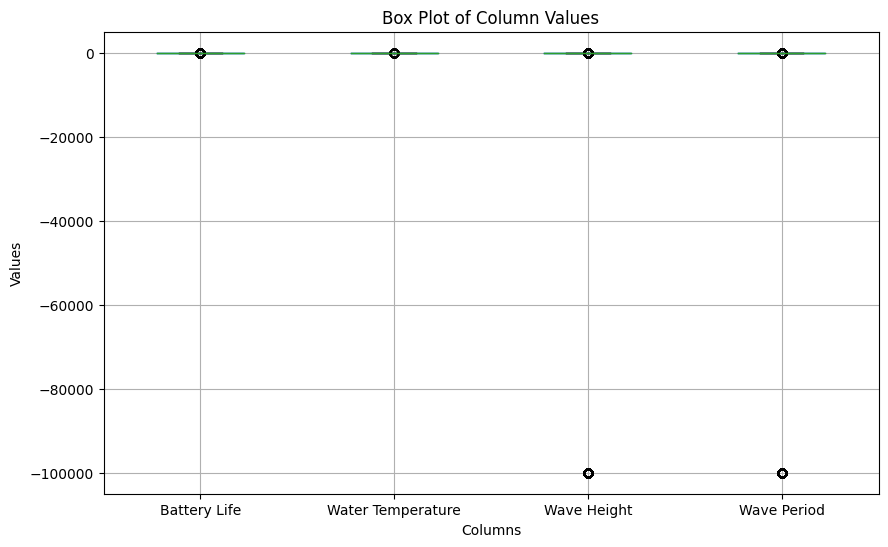

In [26]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [27]:
data = data.drop(data.loc[data['Wave Height']<-999,:].index)

In [28]:
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900
...,...,...,...,...,...,...,...,...,...
40683,Rainbow Beach,2015-09-30 06:00:00,17.3,38.27,0.658,7.0,10.5,09/30/2015 6:00 AM,RainbowBeach201509300600
40703,Calumet Beach,2016-09-20 13:00:00,21.7,3.15,0.389,3.0,9.4,09/20/2016 1:00 PM,CalumetBeach201609201300
40704,Montrose Beach,2016-09-14 19:00:00,21.9,0.01,0.360,3.0,9.4,09/14/2016 7:00 PM,MontroseBeach201609141900
40705,Ohio Street Beach,2021-08-27 16:00:00,24.9,0.80,0.205,5.0,11.0,08/27/2021 4:00 PM,OhioStreetBeach202108271600


Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [29]:
data1 = data.drop(columns=['Beach Name', 'Measurement Timestamp Label','Measurement ID'])

In [30]:
data1.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0
1,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8
2,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3
3,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3
4,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4


In [31]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900


In [32]:
data[data['Beach Name'] == 'Ohio Street Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
1,Ohio Street Beach,2019-06-14 19:00:00,16.0,2.18,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,2018-05-16 13:00:00,21.7,1.92,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,2018-05-16 14:00:00,21.9,1.81,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,2018-06-04 09:00:00,23.0,0.03,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900
5,Ohio Street Beach,2018-06-04 10:00:00,17.6,3.09,0.159,4.0,12.6,06/04/2018 10:00 AM,OhioStreetBeach201806041000
...,...,...,...,...,...,...,...,...,...
33490,Ohio Street Beach,2017-08-05 20:00:00,23.2,3.11,0.187,3.0,11.0,08/05/2017 8:00 PM,OhioStreetBeach201708052000
33491,Ohio Street Beach,2017-08-05 21:00:00,23.0,3.54,0.187,3.0,11.0,08/05/2017 9:00 PM,OhioStreetBeach201708052100
33492,Ohio Street Beach,2017-08-05 22:00:00,22.8,3.21,0.187,3.0,11.0,08/05/2017 10:00 PM,OhioStreetBeach201708052200
33493,Ohio Street Beach,2017-08-05 23:00:00,22.8,3.14,0.187,3.0,11.0,08/05/2017 11:00 PM,OhioStreetBeach201708052300


In [33]:
data[data['Beach Name'] == 'Calumet Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,2018-04-07 00:30:00,21.7,3.15,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
6575,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
6576,Calumet Beach,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
6577,Calumet Beach,2014-05-28 13:00:00,16.3,1.28,0.162,4.0,11.7,5/28/2014 1:00 PM,CalumetBeach201405281300
6578,Calumet Beach,2014-05-28 14:00:00,16.5,1.32,0.185,4.0,11.7,5/28/2014 2:00 PM,CalumetBeach201405281400
...,...,...,...,...,...,...,...,...,...
14140,Calumet Beach,2016-09-20 10:00:00,19.4,0.89,0.378,4.0,9.4,09/20/2016 10:00 AM,CalumetBeach201609201000
14141,Calumet Beach,2016-09-20 11:00:00,19.7,0.95,0.386,3.0,9.4,09/20/2016 11:00 AM,CalumetBeach201609201100
14142,Calumet Beach,2016-09-20 12:00:00,21.5,3.77,0.387,3.0,9.4,09/20/2016 12:00 PM,CalumetBeach201609201200
14144,Calumet Beach,2016-09-20 00:00:00,19.3,0.91,0.184,2.0,9.5,09/20/2016 12:00 AM,CalumetBeach201609202400


### Sorting

In [34]:
data_sorted = data.sort_values(by=['Beach Name','Measurement Timestamp'])
# data_sorted = data.sort_values(by=['Measurement Timestamp','Beach Name'])

In [35]:
data_sorted.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
3156,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000
3157,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200
3158,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300
3159,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400
3160,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,06/12/2014 3:00 PM,63rdStreetBeach201406121500


In [36]:
data_sorted['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

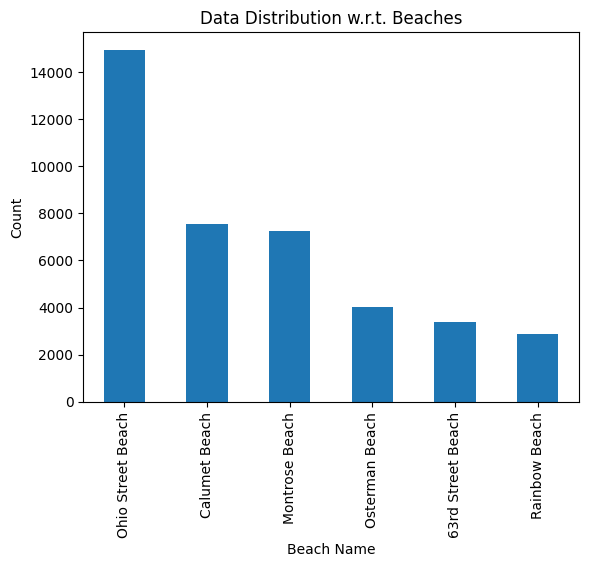

In [37]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [38]:
data_sorted_ohio_b = data_sorted[data_sorted['Beach Name']=='Ohio Street Beach']

In [39]:
data_sorted_ohio_b

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
21445,Ohio Street Beach,2013-09-03 03:00:00,21.9,4.97,0.241,7.0,9.4,09/03/2013 3:00 AM,OhioStreetBeach201309030300
21446,Ohio Street Beach,2014-06-05 12:00:00,16.9,1.60,0.159,3.0,12.8,06/05/2014 12:00 PM,OhioStreetBeach201406051200
21447,Ohio Street Beach,2014-06-06 14:00:00,18.8,0.70,0.135,2.0,12.4,06/06/2014 2:00 PM,OhioStreetBeach201406061400
21448,Ohio Street Beach,2014-06-06 17:00:00,19.8,0.78,0.162,3.0,12.3,06/06/2014 5:00 PM,OhioStreetBeach201406061700
21449,Ohio Street Beach,2014-06-06 18:00:00,19.7,0.77,0.130,3.0,12.3,06/06/2014 6:00 PM,OhioStreetBeach201406061800
...,...,...,...,...,...,...,...,...,...
79,Ohio Street Beach,2021-08-27 01:00:00,23.9,0.88,0.189,3.0,11.0,08/27/2021 1:00 AM,OhioStreetBeach202108270100
80,Ohio Street Beach,2021-08-27 03:00:00,23.9,0.80,0.159,4.0,11.0,08/27/2021 3:00 AM,OhioStreetBeach202108270300
82,Ohio Street Beach,2021-08-27 07:00:00,23.8,1.51,0.149,4.0,11.0,08/27/2021 7:00 AM,OhioStreetBeach202108270700
81,Ohio Street Beach,2021-08-27 12:00:00,24.6,1.31,0.206,5.0,11.0,08/27/2021 12:00 PM,OhioStreetBeach202108271200


In [40]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted.csv")

In [41]:
data_sorted_ohio_b.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted_ohio_b.csv")

In [42]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=10b7e61ab55253099b1ee6f335509e84cd13e5cc987744835361b7cb76344905
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=a1c1dbe4723aec778274be21f55e96f3168e85f948bfb7fd9298a3c68705bb14
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


### Encoding:

Doing the encoding using the get_dummies() method in pandas because UMAP does not allow categorical data.

In [43]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
3156,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000,1,0,0,0,0,0
3157,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200,1,0,0,0,0,0
3158,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300,1,0,0,0,0,0
3159,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400,1,0,0,0,0,0
3160,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,06/12/2014 3:00 PM,63rdStreetBeach201406121500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40678,2015-09-29 17:00:00,19.0,53.26,0.740,7.0,10.7,09/29/2015 5:00 PM,RainbowBeach201509291700,0,0,0,0,0,1
40679,2015-09-29 18:00:00,18.6,36.87,0.685,7.0,10.7,09/29/2015 6:00 PM,RainbowBeach201509291800,0,0,0,0,0,1
40680,2015-09-29 20:00:00,18.1,53.14,0.717,7.0,10.7,09/29/2015 8:00 PM,RainbowBeach201509292000,0,0,0,0,0,1
40682,2015-09-30 05:00:00,17.8,44.90,0.691,7.0,10.5,09/30/2015 5:00 AM,RainbowBeach201509300500,0,0,0,0,0,1


In [44]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [45]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [46]:
encoded_data.columns

Index(['Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID',
       'Beach Name_63rd Street Beach', 'Beach Name_Calumet Beach',
       'Beach Name_Montrose Beach', 'Beach Name_Ohio Street Beach',
       'Beach Name_Osterman Beach', 'Beach Name_Rainbow Beach'],
      dtype='object')

Dropping the columns **Measurement Timestamp Label, Measurement ID**


In [47]:
encoded_data_pre = encoded_data.drop(columns=['Measurement Timestamp Label','Measurement ID'])

In [48]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
3156,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,1,0,0,0,0,0
3157,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,1,0,0,0,0,0
3158,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,1,0,0,0,0,0
3159,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,1,0,0,0,0,0
3160,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40678,2015-09-29 17:00:00,19.0,53.26,0.740,7.0,10.7,0,0,0,0,0,1
40679,2015-09-29 18:00:00,18.6,36.87,0.685,7.0,10.7,0,0,0,0,0,1
40680,2015-09-29 20:00:00,18.1,53.14,0.717,7.0,10.7,0,0,0,0,0,1
40682,2015-09-30 05:00:00,17.8,44.90,0.691,7.0,10.5,0,0,0,0,0,1


###Standardizing the dataset

In [49]:
scaler = StandardScaler()
encoded_data_pre[num_cols] = scaler.fit_transform(encoded_data_pre[num_cols])

##Converting the measurement timestamp to a numeric value:

In [50]:
# timeseries_data = encoded_data_pre['Measurement Timestamp']

# reference_time = timeseries_data.min()

# encoded_data_pre['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60

In [51]:
# Convert datetime to numeric representation
# encoded_data_pre['Measurement Timestamp'] = pd.to_datetime(encoded_data_pre['Measurement Timestamp'])
encoded_data_pre['Measurement Timestamp'] = encoded_data_pre['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [52]:
encoded_data_pre.isna().sum()

Measurement Timestamp             0
Water Temperature                 0
Turbidity                         0
Wave Height                     227
Wave Period                     227
Battery Life                      0
Beach Name_63rd Street Beach      0
Beach Name_Calumet Beach          0
Beach Name_Montrose Beach         0
Beach Name_Ohio Street Beach      0
Beach Name_Osterman Beach         0
Beach Name_Rainbow Beach          0
dtype: int64

There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [53]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(encoded_data_pre) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

encoded_data_pre=pd.DataFrame(data=np.round(new_array), columns=encoded_data_pre.columns)

In [54]:
encoded_data_pre.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
0,1.379498e+09,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.402574e+09,2.0,-0.0,-2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.402578e+09,-0.0,-0.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.402582e+09,-1.0,-0.0,-0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.402585e+09,-1.0,-0.0,-0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


random_state --> This parameter is used to set the random seed for reproducibility

n_neighbors --> This parameter determines the number of nearest neighbors used to construct the local neighborhood for each data point. In UMAP, the algorithm builds a graph representation of the data, and n_neighbors specifies the number of nearest neighbors to consider when constructing the graph. Increasing this value may result in a more global view of the data, while decreasing it may provide a more local perspective.


n_components --> This parameter sets the number of dimensions in the lower-dimensional space to which the data will be projected

min_dist: This parameter controls the minimum distance between points in the lower-dimensional embedding. A higher value of min_dist enforces greater spacing between points, potentially resulting in a clearer visualization

In [55]:
# Apply UMAP to the entire DataFrame
SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 12,
                    n_components = 2,
                    min_dist = 0.5)

# reducer = umap.UMAP(random_state=43)
umap_result = reducer.fit_transform(encoded_data_pre)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [56]:
umap_result

array([[18.33965  ,  4.835174 ],
       [-3.2624867,  5.7453165],
       [-3.2256258,  5.5778084],
       ...,
       [ 1.7104073, -4.2410407],
       [ 1.6481096, -3.642399 ],
       [ 1.7019352, -3.5942495]], dtype=float32)

## Finding the patterens with respect to the Measurement Timestamp:

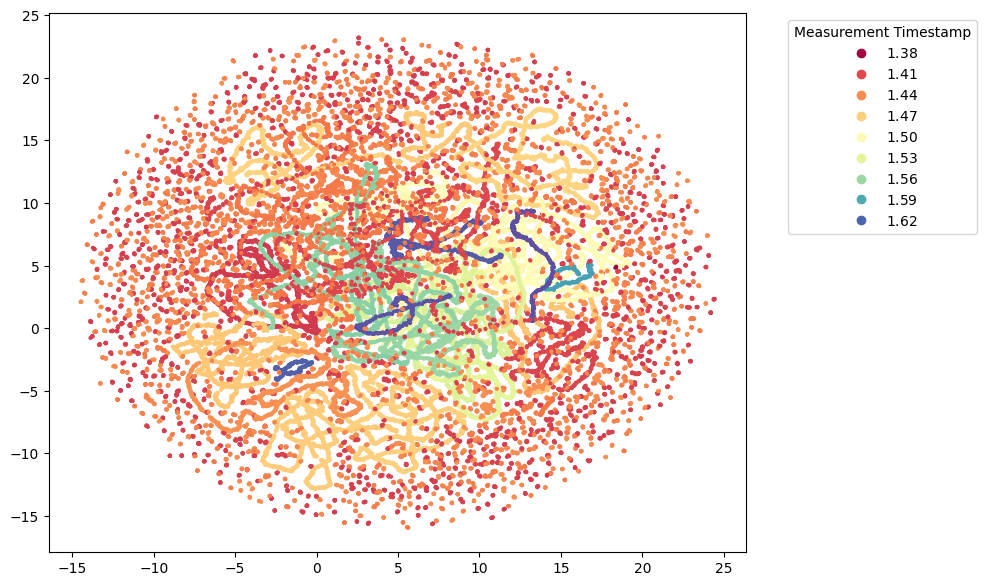

In [57]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=encoded_data_pre['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

## Finding the patterens with respect to the beaches:

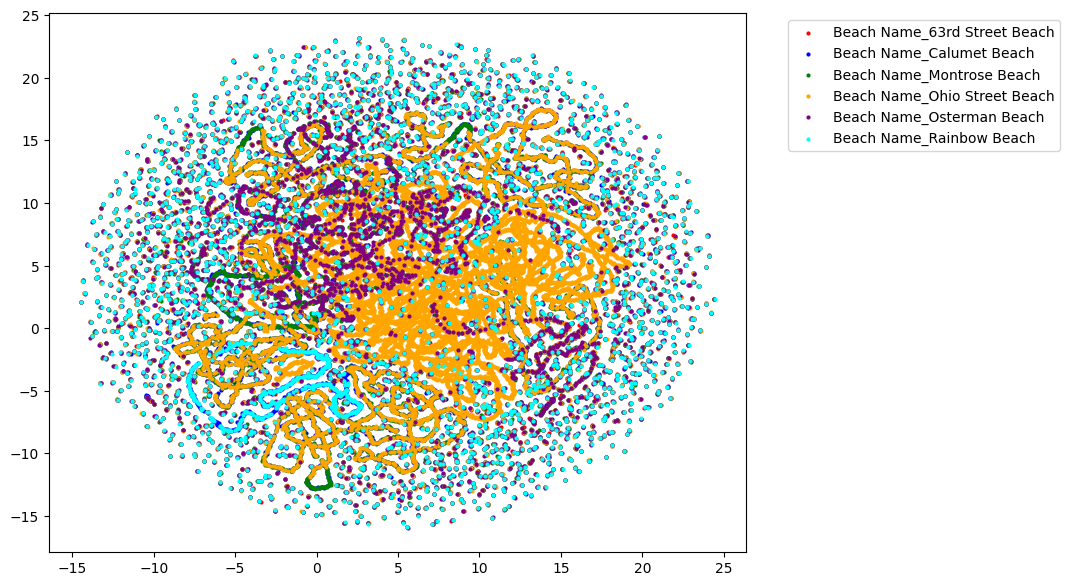

In [58]:
fig, ax = plt.subplots(figsize=(9, 7))

beach_names = ['Beach Name_63rd Street Beach', 'Beach Name_Calumet Beach', 'Beach Name_Montrose Beach',
               'Beach Name_Ohio Street Beach', 'Beach Name_Osterman Beach', 'Beach Name_Rainbow Beach']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a scatter plot of the UMAP embedding
for i, beach in enumerate(beach_names):
    indices = encoded_data_pre[beach].astype(bool)
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], s=4,color=colors[i], label=beach)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [59]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
0,1.379498e+09,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.402574e+09,2.0,-0.0,-2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.402578e+09,-0.0,-0.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.402582e+09,-1.0,-0.0,-0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.402585e+09,-1.0,-0.0,-0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40051,1.443546e+09,-0.0,2.0,7.0,2.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0
40052,1.443550e+09,-0.0,1.0,6.0,2.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0
40053,1.443557e+09,-0.0,2.0,6.0,2.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0
40054,1.443589e+09,-1.0,1.0,6.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_63rd Street Beach,Beach Name_Calumet Beach,Beach Name_Montrose Beach,Beach Name_Ohio Street Beach,Beach Name_Osterman Beach,Beach Name_Rainbow Beach
3156,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000,1,0,0,0,0,0
3157,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200,1,0,0,0,0,0
3158,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300,1,0,0,0,0,0
3159,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400,1,0,0,0,0,0
3160,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,06/12/2014 3:00 PM,63rdStreetBeach201406121500,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40678,2015-09-29 17:00:00,19.0,53.26,0.740,7.0,10.7,09/29/2015 5:00 PM,RainbowBeach201509291700,0,0,0,0,0,1
40679,2015-09-29 18:00:00,18.6,36.87,0.685,7.0,10.7,09/29/2015 6:00 PM,RainbowBeach201509291800,0,0,0,0,0,1
40680,2015-09-29 20:00:00,18.1,53.14,0.717,7.0,10.7,09/29/2015 8:00 PM,RainbowBeach201509292000,0,0,0,0,0,1
40682,2015-09-30 05:00:00,17.8,44.90,0.691,7.0,10.5,09/30/2015 5:00 AM,RainbowBeach201509300500,0,0,0,0,0,1


#Using Label Encoder to convert categorical values into numeric

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
3156,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000
3157,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200
3158,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300
3159,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400
3160,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,06/12/2014 3:00 PM,63rdStreetBeach201406121500
...,...,...,...,...,...,...,...,...,...
40678,Rainbow Beach,2015-09-29 17:00:00,19.0,53.26,0.740,7.0,10.7,09/29/2015 5:00 PM,RainbowBeach201509291700
40679,Rainbow Beach,2015-09-29 18:00:00,18.6,36.87,0.685,7.0,10.7,09/29/2015 6:00 PM,RainbowBeach201509291800
40680,Rainbow Beach,2015-09-29 20:00:00,18.1,53.14,0.717,7.0,10.7,09/29/2015 8:00 PM,RainbowBeach201509292000
40682,Rainbow Beach,2015-09-30 05:00:00,17.8,44.90,0.691,7.0,10.5,09/30/2015 5:00 AM,RainbowBeach201509300500


In [63]:
data_sorted_label_enc = data_sorted
data_sorted_label_enc.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
3156,63rd Street Beach,2013-09-18 10:00:00,18.9,7.56,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000
3157,63rd Street Beach,2014-06-12 12:00:00,25.4,3.45,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200
3158,63rd Street Beach,2014-06-12 13:00:00,18.1,3.31,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300
3159,63rd Street Beach,2014-06-12 14:00:00,17.5,2.93,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400
3160,63rd Street Beach,2014-06-12 15:00:00,17.3,2.22,0.143,4.0,12.1,06/12/2014 3:00 PM,63rdStreetBeach201406121500


In [64]:
lblEn = LabelEncoder()

data_sorted_label_enc['Beach Name'] =lblEn.fit_transform(data_sorted_label_enc['Beach Name'])

In [65]:
lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted_label_enc['Beach Name'].unique()

array(['63rd Street Beach', 'Calumet Beach', 'Montrose Beach',
       'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

In [66]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [67]:
data_sorted_label_enc = data_sorted_label_enc.drop(columns=['Measurement Timestamp Label','Measurement ID'])

Standardizing the numeric columns

In [68]:
scaler = StandardScaler()
data_sorted_label_enc[num_cols] = scaler.fit_transform(data_sorted_label_enc[num_cols])

In [69]:
timeseries_data = data_sorted_label_enc['Measurement Timestamp']

In [70]:
# reference_time = timeseries_data.min()
# data_sorted_label_enc['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60
# data_sorted_label_enc.isna().sum()

In [71]:
# Converting the timestamp to numerical values

data_sorted_label_enc['Measurement Timestamp'] = data_sorted_label_enc['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [72]:
data_sorted_label_enc['Measurement Timestamp']

3156     1.379498e+09
3157     1.402574e+09
3158     1.402578e+09
3159     1.402582e+09
3160     1.402585e+09
             ...     
40678    1.443546e+09
40679    1.443550e+09
40680    1.443557e+09
40682    1.443589e+09
40683    1.443593e+09
Name: Measurement Timestamp, Length: 40056, dtype: float64

In [73]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted_label_enc) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

data_sorted_label_enc=pd.DataFrame(data=np.round(new_array), columns=data_sorted_label_enc.columns)

In [83]:
# Apply UMAP to the entire DataFrame
SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 3,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted_label_enc)

umap_result

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[-4.1324096 , 12.107164  ,  5.350244  ],
       [ 4.1646442 , -0.36117038, 13.019413  ],
       [14.623849  ,  6.7845674 , -2.7473652 ],
       ...,
       [12.787611  ,  3.6607223 ,  3.3568795 ],
       [12.437834  ,  3.8056946 ,  1.9606091 ],
       [12.414255  ,  3.8103912 ,  1.853373  ]], dtype=float32)

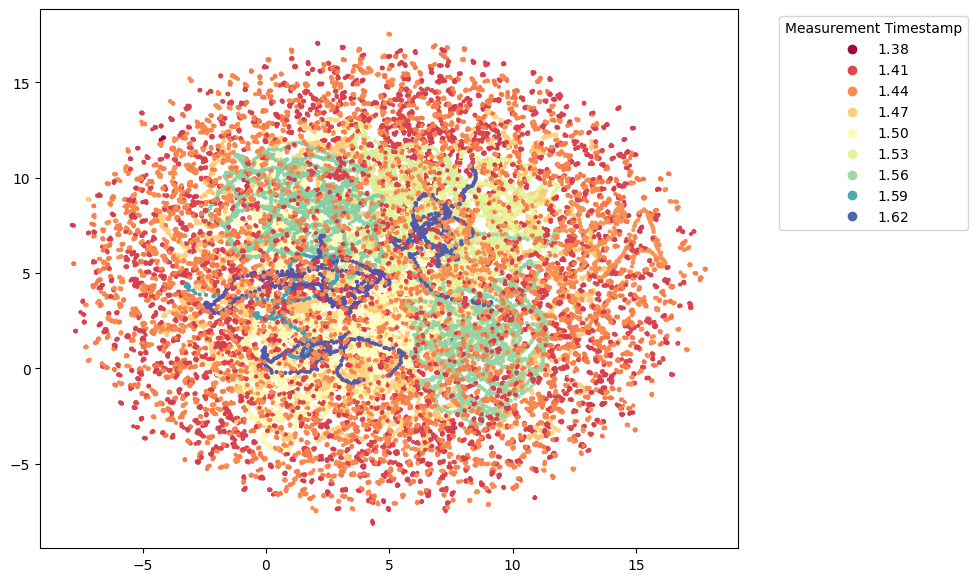

In [84]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

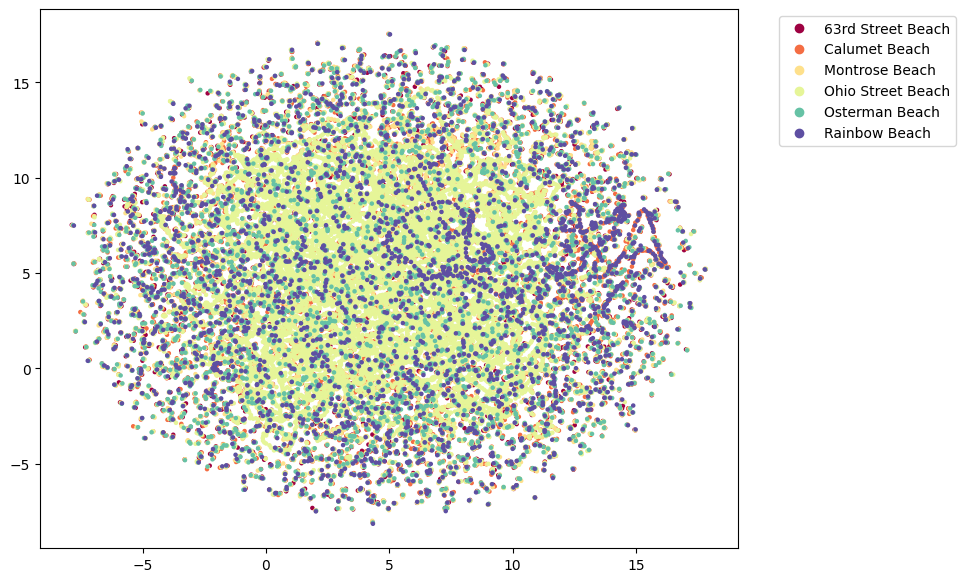

In [85]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Exporting data for the paraview.

In [88]:
data_sorted_label_enc

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0.0,1.379498e+09,-0.0,0.0,-0.0,0.0,-0.0
1,0.0,1.402574e+09,2.0,-0.0,-2.0,3.0,2.0
2,0.0,1.402578e+09,-0.0,-0.0,2.0,4.0,2.0
3,0.0,1.402582e+09,-1.0,-0.0,-0.0,0.0,2.0
4,0.0,1.402585e+09,-1.0,-0.0,-0.0,0.0,1.0
...,...,...,...,...,...,...,...
40051,5.0,1.443546e+09,-0.0,2.0,7.0,2.0,-0.0
40052,5.0,1.443550e+09,-0.0,1.0,6.0,2.0,-0.0
40053,5.0,1.443557e+09,-0.0,2.0,6.0,2.0,-0.0
40054,5.0,1.443589e+09,-1.0,1.0,6.0,2.0,-1.0


In [89]:
# Creating the dataframe from the array umap_result
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])

In [90]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted_label_enc_out = pd.concat([data_sorted_label_enc,umap_result_df], axis=1)

In [91]:
# Exporting the csv file
data_sorted_label_enc_out.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/processed_files/data_sorted_label_enc_out.csv")

In [92]:
data_sorted_label_enc_out

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,UMAP-0,UMAP-1,UMAP-2
0,0.0,1.379498e+09,-0.0,0.0,-0.0,0.0,-0.0,-4.132410,12.107164,5.350244
1,0.0,1.402574e+09,2.0,-0.0,-2.0,3.0,2.0,4.164644,-0.361170,13.019413
2,0.0,1.402578e+09,-0.0,-0.0,2.0,4.0,2.0,14.623849,6.784567,-2.747365
3,0.0,1.402582e+09,-1.0,-0.0,-0.0,0.0,2.0,-1.977223,-0.324722,-0.134064
4,0.0,1.402585e+09,-1.0,-0.0,-0.0,0.0,1.0,7.833520,15.447580,4.534492
...,...,...,...,...,...,...,...,...,...,...
40051,5.0,1.443546e+09,-0.0,2.0,7.0,2.0,-0.0,12.820165,3.587810,3.898205
40052,5.0,1.443550e+09,-0.0,1.0,6.0,2.0,-0.0,12.831590,3.623453,3.692286
40053,5.0,1.443557e+09,-0.0,2.0,6.0,2.0,-0.0,12.787611,3.660722,3.356879
40054,5.0,1.443589e+09,-1.0,1.0,6.0,2.0,-1.0,12.437834,3.805695,1.960609
